In [13]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


import tensorflow 
from tensorflow.keras.optimizers import SGD       
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import VGG16   #VGG16 pretrained weights    
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D


# to make this notebook's output stable across runs
np.random.seed(42)
tensorflow.random.set_seed(42)

In [26]:
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")

print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

# Load training data
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

# Load test data
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


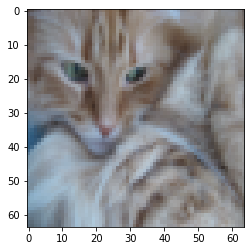

In [38]:
classes = np.array(test_dataset["list_classes"][:])

print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))

plt.imshow(train_set_x_orig[2])

In [41]:
validation_x = test_set_x_orig[:25] 
validation_y = test_set_y_orig[:25]

test_set_x = test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]

print("train_set_x shape: ", train_set_x_orig.shape)
print("train_set_y shape: ", train_set_y_orig.shape)

print("Validation data size: ",validation_x.shape)
print("Validation data size: ", validation_y.shape)

print("test_set_x shape: ", test_set_x.shape)
print("test_set_y shape: ", test_set_y.shape)

train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (209,)
Validation data size:  (25, 64, 64, 3)
Validation data size:  (25,)
test_set_x shape:  (25, 64, 64, 3)
test_set_y shape:  (25,)


In [55]:
vgg_base = VGG16(weights='imagenet', include_top=False)

vgg_base.trainable=False

58892288/58889256 [==============================] - 2s 0us/step


In [60]:
inp = Input(shape=(64, 64, 3), name='image_input')

#initiate a model
vgg_model = Sequential() #Add the VGG base model
vgg_model.add(vgg_base)

vgg_model.add(GlobalAveragePooling2D())

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.6))

vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dropout(0.5))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.4))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.3))

vgg_model.add(Dense(1, activation='sigmoid'))

In [65]:
sgd = SGD(lr=0.025)
vgg_model.compile(loss='binary_crossentropy', optimizer=sgd,    metrics=['accuracy'])

In [70]:
vgg_model.fit(train_set_x_orig, train_set_y_orig, epochs=10, verbose=1, validation_data=(validation_x, validation_y))

Train on 209 samples, validate on 25 samples
Epoch 1/10
209/209 [==============================] - 3s 16ms/sample - loss: 27.8695 - accuracy: 0.5263 - val_loss: 0.5230 - val_accuracy: 0.7600
Epoch 2/10
209/209 [==============================] - 2s 8ms/sample - loss: 0.6574 - accuracy: 0.6651 - val_loss: 0.5303 - val_accuracy: 0.6400
Epoch 3/10
209/209 [==============================] - 2s 9ms/sample - loss: 0.7430 - accuracy: 0.7081 - val_loss: 0.3530 - val_accuracy: 0.7600
Epoch 4/10
209/209 [==============================] - 2s 8ms/sample - loss: 0.4528 - accuracy: 0.8373 - val_loss: 0.2090 - val_accuracy: 1.0000
Epoch 5/10
209/209 [==============================] - 2s 8ms/sample - loss: 0.3711 - accuracy: 0.8517 - val_loss: 0.1913 - val_accuracy: 0.9600
Epoch 6/10
209/209 [==============================] - 2s 8ms/sample - loss: 0.2834 - accuracy: 0.8708 - val_loss: 0.1721 - val_accuracy: 0.9600
Epoch 7/10
209/209 [==============================] - 2s 8ms/sample - loss: 0.2183 - accu

In [73]:
vgg_model_loss, vgg_model_acc = vgg_model.evaluate(test_set_x_orig,test_set_y_orig)
print('Test accuracy using VGG16 model as base:', vgg_model_acc)

50/50 [==============================] - 0s 7ms/sample - loss: 0.2468 - accuracy: 0.8800
Test accuracy using VGG16 model as base: 0.88


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

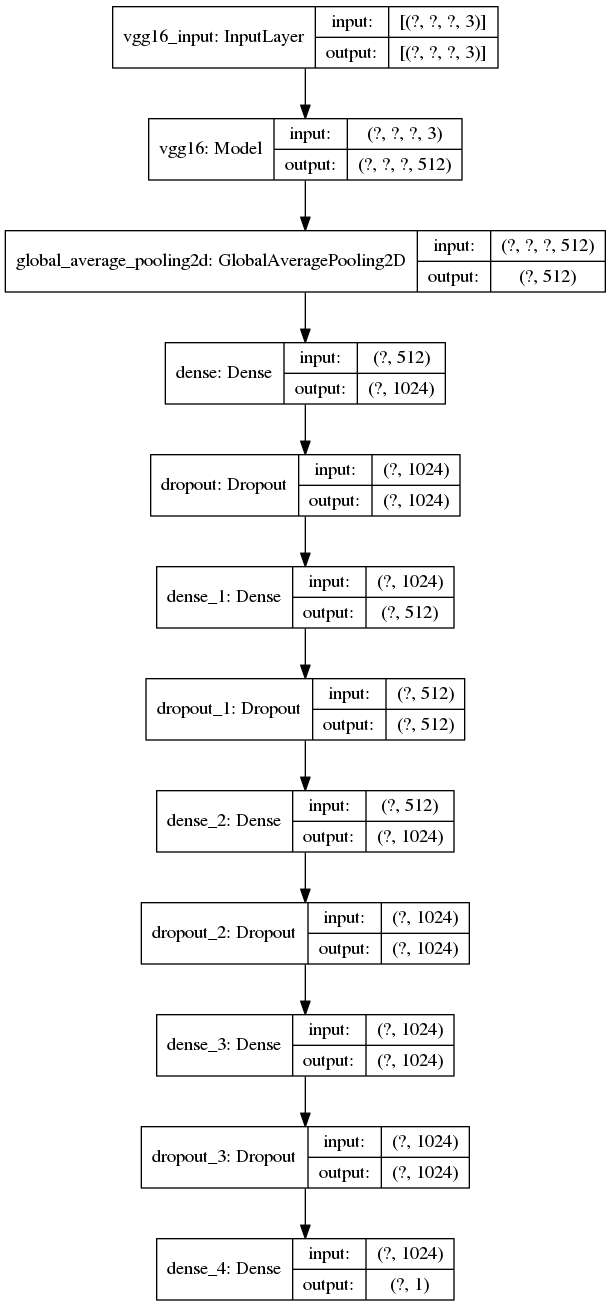

In [77]:
vgg_base.summary()

from tensorflow.keras.utils import plot_model
plot_model(vgg_base, show_shapes=True, show_layer_names=True)

vgg_model.summary()
plot_model(vgg_model, show_shapes=True, show_layer_names=True)